**Staement: Having a porch increases home sale price**

**H<sub>0</sub> =Home sale price will decrease of reamin the same if it has a porch.**

**H<sub>A</sub>= Home sale price will increase if the propery has a porch.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", 0)
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2
%matplotlib inline

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

# Import neccesary data sets

mean/medain of porch house vesisu house

In [3]:
sales_2019=pd.read_csv('../../data/EXTR_RPSale_2019.csv',dtype={'ExciseTaxNbr': 'string','Major': 'string','Minor': 'string','PIN':'string'})
PINS=pd.read_csv('../../data/PINS.csv',dtype={'ExciseTaxNbr': 'string','Major': 'string','Minor': 'string','PIN':'string'})
bldinfo_2019 = pd.read_csv('../../data/EXTR_ResBldg_2019.csv', dtype={'Major': 'str', 'Minor':'str', 'ZipCode': 'str','PIN':'string'})

In [4]:
sales_0=sales_2019[sales_2019["SalePrice"]==0]
sales_0.SaleInstrument.value_counts()

15    10410
3     1882 
26    343  
24    267  
2     232  
27    100  
4     93   
22    42   
18    35   
21    9    
19    8    
20    2    
23    1    
1     1    
Name: SaleInstrument, dtype: int64

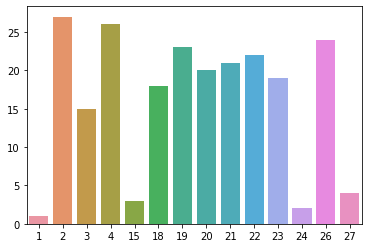

In [5]:
zero_df = sales_2019.loc[sales_2019['SalePrice']==0]
x = zero_df['SaleInstrument'].unique()
y = zero_df['SaleInstrument'].value_counts()
barplot = sns.barplot(x=x,y=y.index)

In [6]:
total=len(sales_0)

In [7]:
1   /total*100

0.0074487895716946004

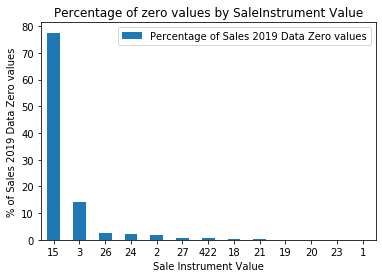

In [8]:
vis_data=pd.DataFrame({'Sale Instrument Value':['15', '3','26','24','2','27','4''22','18','21','19','20','23','1'] ,'Percentage of Sales 2019 Data Zero values':[77.54189944134077426187, 14.018621973929237, 2.5549348230912474, 1.9888268156424582, 1.728119180633147, 0.74487895716946,0.6927374301675978, 0.3128491620111732, 
                                                                                                                                                 0.260707635009311 ,0.0670391061452514,0.059590316573556804,0.014897579143389201,0.0074487895716946004]})

ax = vis_data.plot.bar(x='Sale Instrument Value', y='Percentage of Sales 2019 Data Zero values', rot=0, title='Percentage of zero values by SaleInstrument Value')
ax.set_ylabel('% of Sales 2019 Data Zero values');


In [9]:
sale_15=sales_0[sales_0["SaleInstrument"]==15]
sale_15

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
6,1021335,2980649,797320,2320,2019-03-28,0,,,,,,,,CARDONA ROMINA GUZMAN,MARTINEZ JAVIER JIMENEZ,3,6,15,N,N,N,N,10,8,18 31 51,7973202320
7,600,3013394,663990,0178,2019-10-02,0,20191002000875,,,,,,,HAN CHAO+GAO YUE,GAO YUE,3,6,15,N,N,N,N,19,8,18 31 51 52,6639900178
11,716,3028464,640331,0010,2019-12-31,0,20200102000331,,,,,,,WARNER NANCY L,WARNER NANCY L+WARNER CREDIT SHELTER TRUST TODD GR,11,6,15,N,N,N,N,1,8,,6403310010
12,363667,3007081,640331,0010,2019-08-20,0,20190827000878,,,,,,,WARNER NICHOLAS,WARNER NICHOLAS,11,6,15,N,N,N,N,1,8,,6403310010
13,725,3004740,040510,0150,2019-07-12,0,20190814000349,,,,,,,GILLESPIE CAROL A+RICHARD W,GILLESPIE CAROL A+RICHARD W+ET AL,11,6,15,N,N,N,N,1,8,,0405100150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42653,2086580,3014179,810860,0240,2019-09-30,0,20191007001830,,,,,,,SEGALE MARK A+KERI D,SEGALE MARK A+KERI D-FLT+TTEES,3,6,15,N,N,N,N,5,8,12 18 31,8108600240
42665,2087132,3010345,636290,0116,2019-09-13,0,20190916000748,,,,,,,SHEPARD DAVID J,SHEPARD DAVID J+SHEPARD LIVING TRUST,11,6,15,N,N,N,N,1,8,18,6362900116
42666,2087143,3007943,242303,9158,2019-07-20,0,20190830001205,,,,,,,MCKITTRICK LANYA L,MCKITTRICK TODD M+LANYA L,3,6,15,N,N,N,N,13,8,18 31 51,2423039158
42667,2087558,3011447,004200,0010,2019-09-23,0,20190923001098,,,,,,,SWAFFORD VICKIE+RICHARD,KOCH-JOHNSON ALICIA,11,6,15,N,N,N,N,1,8,,0042000010


In [10]:
actual_sales=sales_2019[(sales_2019["SaleReason"]==1)|(sales_2019["SaleReason"]==18)]
actual_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A,STONE AVENUE HOUSE LLC,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M,PEDERSEN MICHAEL J,11,6,15,N,N,N,N,1,8,,3023000320


# Now one more filter to only display residential sale

In [11]:
res_sales=actual_sales[(actual_sales["PropertyClass"]==7)|(actual_sales["PropertyClass"]==8)]
res_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A,STONE AVENUE HOUSE LLC,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M,PEDERSEN MICHAEL J,11,6,15,N,N,N,N,1,8,,3023000320


# Lastly, we need to filter out the zeros in the Sales column. This is because of how it will heavily screw the data. 

In [12]:
finalsales=res_sales[res_sales["SalePrice"]!=0]
finalsales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505


# Next we will filter out our outlier based on Z scores. 

In [13]:
z_score=np.abs(stats.zscore(finalsales["SalePrice"]))
siftedsales=finalsales[z_score <3]
siftedsales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505


# Now we have our sifted out sales data we now need to create our porch data

In [14]:
has_porch= bldinfo_2019[(bldinfo_2019["SqFtOpenPorch"]!=0)|(bldinfo_2019["SqFtEnclosedPorch"]!=0)]
# has_porch["porch"]= bldinfo_2019["SqFtOpenPorch"]+ bldinfo_2019["SqFtEnclosedPorch"]

In [15]:
has_porch["porch"]=(has_porch["SqFtOpenPorch"]+ has_porch["SqFtEnclosedPorch"])

<ipython-input-15-d5a44313ee20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_porch["porch"]=(has_porch["SqFtOpenPorch"]+ has_porch["SqFtEnclosedPorch"])


In [16]:
has_porch

,Unnamed: 0,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PIN,porch
0,16,010050,0380,1,1,2435 S 354TH ST 98003,2435,,S,354TH,ST,,98003,1.0,7,0,1480,0,0,0,0,0,1480,0,0,0,0,440,,80,0,120,5,2,0,,3,0,0,2,1,0,0,0,1994,0,0,0,0,5,0,0100500380,80
4,38,018880,0210,1,1,3410 SE 18TH ST,3410,,SE,18TH,ST,,NaN,2.0,9,0,1602,0,1991,0,0,0,3593,0,0,0,0,520,N,204,0,0,5,2,0,N,4,1,0,4,1,0,0,1,2019,0,49,0,0,3,0,0188800210,204
5,41,019110,0145,1,1,4512 90TH AVE SE 98040,4512,,,90TH,AVE,SE,98040,1.0,8,0,2290,0,0,0,0,0,2290,0,0,0,0,0,,250,0,0,6,2,95,,3,1,1,1,1,0,0,0,1950,0,0,0,0,4,0,0191100145,250
7,54,017900,1770,1,1,12207 50TH AVE S 98168,12207,,,50TH,AVE,S,98168,1.0,8,0,1350,0,0,0,0,0,2230,1280,880,7,400,80,Y,40,0,100,5,3,0,,3,0,0,2,1,0,0,0,2015,0,0,0,0,3,0,0179001770,40
9,82,017900,2305,1,1,12517 51ST PL S,12517,,,51ST,PL,S,NaN,1.0,8,0,2190,0,0,0,0,0,2190,0,0,0,0,760,N,140,0,0,5,2,0,N,4,1,0,2,0,0,0,0,2015,0,0,0,0,3,0,0179002305,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37930,514925,430735,1100,1,1,3103 SE 4TH ST 98056,3103,,SE,4TH,ST,,98056,2.0,7,0,1630,0,2250,0,0,0,3880,0,0,0,0,610,N,340,0,0,5,2,0,N,5,0,0,3,1,0,0,0,2004,0,0,0,0,3,3500,4307351100,340
37931,514934,431070,0295,1,1,9721 WALLINGFORD AVE N 98103,9721,,,WALLINGFORD,AVE,N,98103,1.0,7,0,890,0,0,0,0,0,990,890,100,6,240,0,N,40,0,0,5,1,0,N,3,0,0,1,0,0,1,0,1908,0,0,0,0,3,0,4310700295,40
37942,515014,873218,0020,1,1,32602 47TH AVE SW 98023,32602,,,47TH,AVE,SW,98023,1.0,8,0,1290,0,0,0,0,0,1910,620,620,8,0,0,Y,70,0,100,5,2,0,N,3,1,1,1,0,0,0,0,1985,0,0,0,0,4,0,8732180020,70
37944,515045,880590,0420,1,1,2026 E LOUISA ST 98112,2026,,E,LOUISA,ST,,98112,1.5,8,0,1090,800,0,0,0,0,2390,1090,500,6,180,0,N,40,0,350,5,2,0,N,4,0,0,2,0,1,0,0,1927,0,0,0,0,3,0,8805900420,40


In [60]:
no_zeor_closed=has_porch[has_porch["SqFtEnclosedPorch"]!=0]
no_zeor_closed

In [61]:
no_zeor_closed["SqFtEnclosedPorch"].mean()

121.78618421052632

In [55]:
has_porch["SqFtEnclosedPorch"].mean()

10.768760907504364

In [56]:
has_porch["SqFtOpenPorch"].mean()

141.53437075819275

In [50]:
has_porch["SqFtOpenPorch"].value_counts()

40     1792
50     1595
60     1539
80     1259
70     1143
       ... 
396    1   
524    1   
572    1   
588    1   
607    1   
Name: SqFtOpenPorch, Length: 414, dtype: int64

In [124]:
875205.461228/141

6207.130930695035

In [126]:
782780.426187/121.78618421052632

6427.497759793858

In [19]:
no_porch= bldinfo_2019[(bldinfo_2019["SqFtOpenPorch"]==0)|(bldinfo_2019["SqFtEnclosedPorch"]==0)]

In [48]:
open_porch=has_porch.loc[:["SqFtOpenPorch"]]
open_porch

TypeError: '['SqFtOpenPorch']' is an invalid key

# Merge our residential porches data with our now sifted sales data on the unique identifiers known as a PIN.

In [109]:
sales_and_porch=siftedsales.merge(has_porch, how="inner", on="PIN")
sales_and_porch

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN,Unnamed: 0_y,Major_y,Minor_y,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,porch
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120,149390,213043,0120,1,1,27033 NE DOROTHY ST 98019,27033,,NE,DOROTHY,ST,,98019,1.0,7,0,1930,0,0,0,0,0,1930,0,0,0,0,550,,180,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0,180
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630,488069,940652,0630,1,1,22848 SE 264TH CT 98038,22848,,SE,264TH,CT,,98038,2.0,7,0,1057,0,918,0,0,0,1975,0,0,0,0,465,,45,0,0,5,2,0,,3,0,2,1,0,1,0,0,1994,0,0,0,0,3,2500,45
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020,24064,140281,0020,1,1,27001 NE MILLER ST 98019,27001,,NE,MILLER,ST,,98019,1.0,7,0,1080,0,0,0,0,0,1080,0,0,0,0,400,,110,0,80,1,3,0,,3,0,0,2,1,0,0,0,1986,0,0,0,0,3,0,110
3,2016726,3014031,663990,0178,2019-10-04,950000,20191007000828,,,,,,,GAO YUE,SHASHIDHARA ARJUN+ACHALKAR SNEHA,3,6,3,N,N,N,N,1,8,,6639900178,347131,663990,0178,1,1,12310 NE 100TH PL 98033,12310,,NE,100TH,PL,,98033,2.0,8,0,1360,0,910,0,0,0,2270,0,0,0,0,660,,60,0,310,5,2,0,,3,1,0,2,1,1,0,0,1994,0,0,0,0,3,0,60
4,882,3003196,188780,0340,2019-07-23,1445000,20190802001114,,,,,,,MAINVUE WA LLC,PANDEY ASEEM+MAMTA,10,6,3,N,N,N,N,1,8,,1887800340,392737,188780,0340,1,1,3861 223RD AVE SE 98075,3861,,,223RD,AVE,SE,98075,2.0,9,0,2150,0,2770,0,0,0,4920,0,0,0,0,490,,300,0,0,5,2,0,,5,2,1,3,1,0,0,0,2018,0,0,0,0,3,0,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15857,2087639,3000521,200900,1424,2019-07-14,3375000,20190722000385,,,,,,,BELL CAROLYN,MINARDI PAUL M AND CAMILLE G TRUSTEES +PAUL M+ET A,11,6,3,N,N,N,N,1,8,,2009001424,105901,200900,1424,1,1,21827 4TH AVE S,21827,,,4TH,AVE,S,NaN,2.0,12,0,3169,0,3261,0,0,0,6430,0,0,0,0,1480,N,110,0,276,5,2,10,N,5,2,2,2,2,0,0,0,2008,0,0,0,0,3,0,110
15858,2087713,3012427,374670,0090,2019-09-16,1250000,20190927001174,,,,,,,WALIA SANDEEP+EMMA,BRIGHAM JARED JAMES+MEGHAN MAUREEN,11,6,3,N,N,N,N,1,8,,3746700090,155842,374670,0090,1,1,618 SW 185TH ST,618,,SW,185TH,ST,,NaN,2.0,11,0,1916,0,2101,0,0,0,4017,0,0,0,0,1062,N,632,0,0,5,2,5,N,5,0,1,2,3,0,0,0,2015,0,0,0,0,3,0,632
15859,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760,416400,929085,0760,1,1,10316 214TH AVE NE 98052,10316,,,214TH,AVE,NE,98052,1.0,10,0,2880,0,0,0,0,0,2880,0,0,0,0,870,,130,0,470,7,2,0,,4,1,0,2,2,0,0,0,1989,0,0,0,0,3,0,130
15860,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505,332441,615020,0505,1,1,13522 BURKE AVE N 98133,13522,,,BURKE,AVE,N,98133,2.

In [21]:
sales_and_no_porch=siftedsales.merge(no_porch, how="inner", on="PIN")
sales_and_no_porch

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN,Unnamed: 0_y,Major_y,Minor_y,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120,149390,213043,0120,1,1,27033 NE DOROTHY ST 98019,27033,,NE,DOROTHY,ST,,98019,1.0,7,0,1930,0,0,0,0,0,1930,0,0,0,0,550,,180,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630,488069,940652,0630,1,1,22848 SE 264TH CT 98038,22848,,SE,264TH,CT,,98038,2.0,7,0,1057,0,918,0,0,0,1975,0,0,0,0,465,,45,0,0,5,2,0,,3,0,2,1,0,1,0,0,1994,0,0,0,0,3,2500
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020,24064,140281,0020,1,1,27001 NE MILLER ST 98019,27001,,NE,MILLER,ST,,98019,1.0,7,0,1080,0,0,0,0,0,1080,0,0,0,0,400,,110,0,80,1,3,0,,3,0,0,2,1,0,0,0,1986,0,0,0,0,3,0
3,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098,5810,124550,0098,1,1,9823 FORBES CREEK DR 98033,9823,,,FORBES CREEK,DR,,98033,1.0,7,0,1140,0,0,0,0,0,1760,1030,620,6,410,100,,0,0,220,5,2,0,,3,0,1,1,0,1,0,0,1980,0,0,0,0,3,0
4,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320,377823,797320,2320,1,1,10246 5TH AVE SW 98146,10246,,,5TH,AVE,SW,98146,1.0,6,0,860,0,0,0,0,0,1240,380,380,6,0,0,,0,0,0,5,2,0,,3,1,1,1,1,0,0,0,1930,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28032,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760,416400,929085,0760,1,1,10316 214TH AVE NE 98052,10316,,,214TH,AVE,NE,98052,1.0,10,0,2880,0,0,0,0,0,2880,0,0,0,0,870,,130,0,470,7,2,0,,4,1,0,2,2,0,0,0,1989,0,0,0,0,3,0
28033,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095,222599,405940,0095,1,1,11234 CORNELL AVE S 98178,11234,,,CORNELL,AVE,S,98178,1.0,6,0,1430,0,0,0,0,0,1430,0,0,0,0,0,,0,0,200,4,3,0,,4,1,0,2,1,0,0,0,1944,0,0,0,0,4,0
28034,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025,358894,381670,0025,1,1,18741 62ND AVE NE 98028,18741,,,62ND,AVE,NE,98028,1.0,8,0,1520,0,0,0,0,0,2270,1520,750,7,0,440,Y,0,0,450,5,1,0,,3,0,1,1,0,1,0,1,1958,0,0,0,0,3,0
28035,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505,332441,615020,0505,1,1,13522 BURKE AVE N 98133,13522,,,BURKE,AVE,N,98133,2.0,7,0,840,0,1410,0,0,0,2250,0,0,0,0,0,,450,0,0,5,2,0,,3,1,0,2,1,0,0,0,194

In [22]:
sales_and_porch["no_porch_sales"]=sales_and_noporch["SalePrice"]
sales_and_porch

NameError: name 'sales_and_noporch' is not defined

In [111]:
sales_and_nporch=siftedsales.merge(no_zeor_closed, how="inner", on="PIN")
sales_and_nporch

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN,Unnamed: 0_y,Major_y,Minor_y,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,porch
0,1355,3020690,345960,0230,2019-10-30,1255000,20191114001849,,,,,,,EEP JIAGEN+PEH WEI PING,GRAEBEL RELOCATION SERVICES WORLDWIDE INC,11,6,3,N,N,N,N,1,8,40,3459600230,306191,345960,0230,1,1,4651 147TH PL SE 98006,4651,,,147TH,PL,SE,98006,1.0,9,0,1760,0,0,0,0,0,2680,1700,920,8,780,0,Y,0,330,790,5,2,0,N,4,0,2,1,0,1,0,1,1978,0,0,0,0,5,0,330
1,218277,3020691,345960,0230,2019-10-30,1255000,20191114001850,,,,,,,GRAEBEL RELOCATION SERVICES WORLDWIDE INC,JIN TAIHENG+MU YADAN,11,6,3,N,N,N,N,1,8,41,3459600230,306191,345960,0230,1,1,4651 147TH PL SE 98006,4651,,,147TH,PL,SE,98006,1.0,9,0,1760,0,0,0,0,0,2680,1700,920,8,780,0,Y,0,330,790,5,2,0,N,4,0,2,1,0,1,0,1,1978,0,0,0,0,5,0,330
2,3790,2971992,982870,1940,2019-01-29,880000,20190131000204,,,,,,,LLJ VENTURES LLC,SONG ANDI J,2,6,3,N,N,N,N,1,8,,9828701940,491901,982870,1940,1,1,107 27TH AVE E 98112,107,,,27TH,AVE,E,98112,3.0,9,0,610,0,610,610,0,0,1830,0,0,0,0,0,N,0,130,480,7,2,0,N,3,0,1,1,0,0,0,0,2018,0,0,0,0,3,0,130
3,5379,3006165,274210,0116,2019-08-14,631000,20190821001288,,,,,,,BOUJRADA MEHDI+NINONA F,MATHISEN LAUREN C+CARR BRYAN W,11,6,3,N,N,N,N,1,8,,2742100116,148248,274210,0116,1,1,5211 30TH AVE S 98108,5211,,,30TH,AVE,S,98108,1.0,6,0,720,0,0,0,0,0,720,660,0,0,0,0,N,110,40,0,1,3,0,N,2,0,0,1,1,0,0,0,1927,0,0,0,0,4,0,150
4,6500,3003081,288320,0305,2019-08-01,660000,20190802000635,,,,,,,TEICHERT GILLIAN M,UPTON PARK LLC,3,6,3,N,N,N,N,1,8,51,2883200305,181986,288320,0305,1,1,2015 N 75TH ST 98103,2015,,N,75TH,ST,,98103,2.0,8,0,990,0,1100,0,0,0,2280,790,190,8,520,0,,260,180,140,5,2,0,,3,0,1,2,0,1,0,1,1900,1973,0,0,0,3,0,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,2082805,3015547,213870,0245,2019-10-09,1450000,20191016000513,,,,,,,ALEXANDER JOHN BRADFORD+MARY C,ALLEN JEFFREY H+AMY,11,6,3,N,N,N,N,1,8,,2138700245,64789,213870,0245,1,1,2416 WARREN AVE N 98109,2416,,,WARREN,AVE,N,98109,2.0,8,0,740,0,760,0,0,0,2240,740,740,8,0,0,N,90,90,310,5,2,0,N,3,1,0,2,0,1,0,0,1915,0,0,0,0,5,0,180
1350,2083080,2989048,322207,9085,2019-05-13,410000,20190521001254,,,,,,,EARL DALLAS R+CHRISTINE D,SAMUEL PAUL A+KELLY JILL E,3,6,3,N,N,N,N,1,8,,3222079085,212207,322207,9085,1,1,27421 RETREAT-KANASKAT RD SE 98051,27421,,,RETREAT-KANASKAT,RD,SE,98051,1.0,7,0,1420,0,0,0,0,0,1420,0,0,0,0,0,,0,50,200,5,1,0,,3,0,1,1,0,0,1,0,1970,0,0,0,0,5,0,50
1351,2086975,2982184,125720,0205,2019-04-02,1360000,20190412001206,,,,,,,STOCKING BENJAMIN RALPH+MEASHAM DIANA MAY,WILSON GREGORY P+STROMBERG CAROLINE,11,6,3,N,N,N,N,1,8,,1257200205,48426,125720,0205,1,1,126 NE 62ND ST 98115,126,,NE,62ND,ST,,98115,1.5,8,0,1130,730,0,0,0,0,2940,1080,1080,7,0,0,N,220,100,280,6,2,0,N,4,1,1,1,1,0,0,0,1907,0,0,0,0,5,0,320
1352,2087588,2993049,436520,0005,2019-06-10,395000,20190611001327,,,,,,,SISSEL AMBER R+CALVIN N,CARLISI NICHOLAS+MAIER M

In [127]:
vis_data=pd.DataFrame({'Mean Sale Price in USD':[782780.426187, 6207.130930695035],'House Clasification':['No Porch', 'Porch'] })
# vis_data= vis_data.transpose()
# vis_data.mean()
vis_data["Mean Sale Price in USD"]

0    782780.426187
1    6207.130931  
Name: Mean Sale Price in USD, dtype: float64

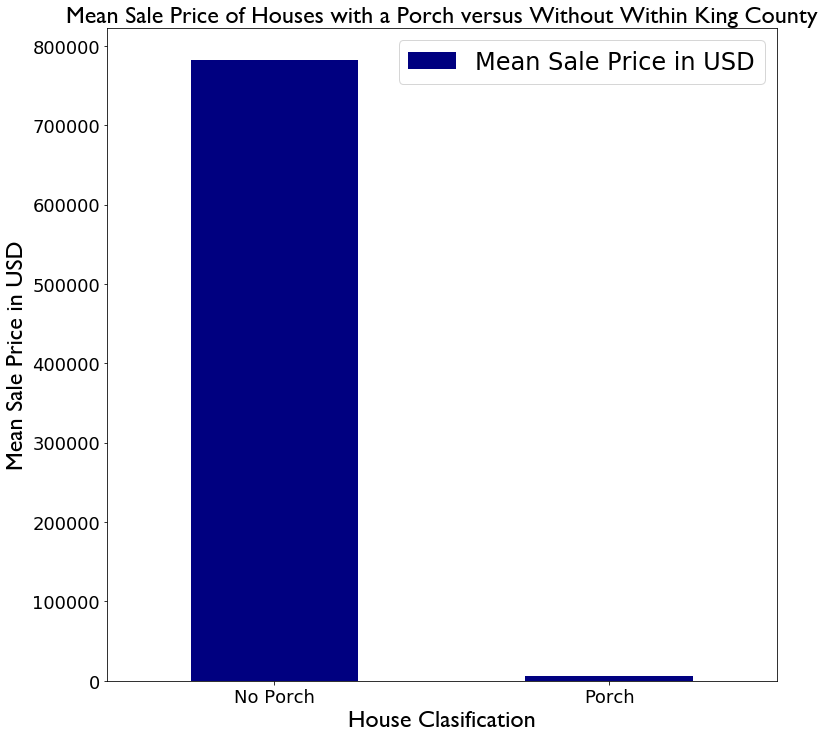

In [128]:
fig = vis_data.plot.bar(x='House Clasification',rot=0,colormap='jet', fontsize=18,figsize=(12,12))
fig.set_ylabel('Mean Sale Price in USD', fontsize=24,fontname="Gill Sans MT")
fig.set_title('Mean Sale Price of Houses with a Porch versus Without Within King County', fontsize=24,fontname="Gill Sans MT")
fig.set_xlabel('House Clasification', fontsize=24,fontname="Gill Sans MT");
plt.savefig('Porch.png', transparent=True)


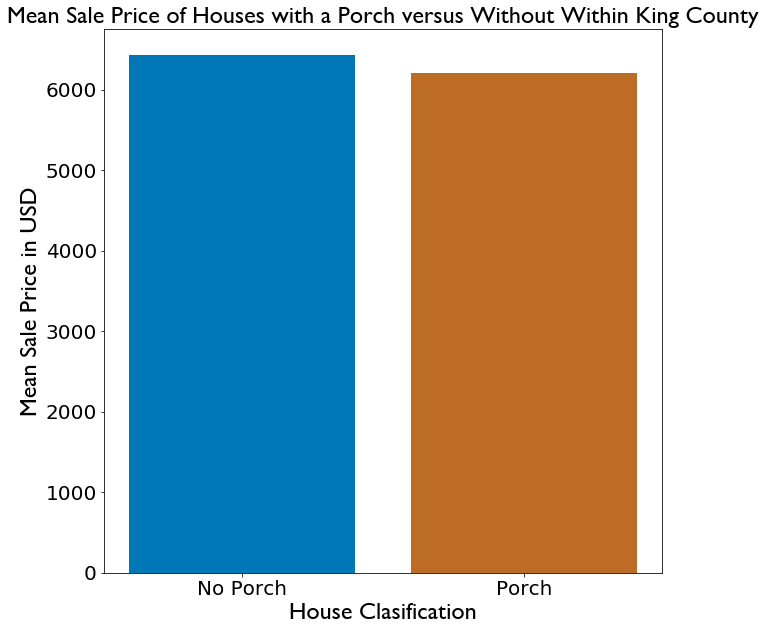

In [130]:
plt.figure(figsize=(10,10))
plt.bar(x=["No Porch","Porch"],height=[782780.426187, 875205.461228],color=["#0077b6", "BC6C25"],);
plt.ylabel('Mean Sale Price in USD', fontsize=24,fontname="Gill Sans MT")
plt.title('Mean Sale Price of Houses with a Porch versus Without Within King County', fontsize=24,fontname="Gill Sans MT")
plt.xlabel('House Clasification', fontsize=24,fontname="Gill Sans MT")
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.savefig('GPorch.png', transparent=True,dpi=300, bbox_inches = "tight")
plt.show()

In [25]:
vis_data=pd.DataFrame({'Mean Sale Price in USD':[782780.426187, 875205.461228],'House Clasification':['No Porch', 'Porch'] })
# vis_data= vis_data.transpose()
# vis_data.mean(), 'No Porch': 
vis_data["Mean Sale Price in USD"]No Porch': no_porch}
No Porch'

SyntaxError: invalid syntax (<ipython-input-25-600538bd5b7b>, line 4)

In [ ]:
porch = [875205.461228]
no_porch = [782780.426187]
index = ['Porch', 'No Porch']
df = pd.DataFrame({'Mean Sale Values': porch, no_porch,
                   'Columns':["Porch" , "No Porch"]}, index=index)
ax = df.plot.bar(rot=0)

In [ ]:
graph1=sales_and_porch["SalePrice"].mean()
graph1


In [ ]:
graph2=sales_and_porch["no_porch_sales"].mean()
graph2

In [ ]:
vis2_data=pd.DataFrame({'MeanSquareFootagePorch':[10.768760907504364, 141.53437075819275],'Porch Style':['Enclosed Porch', 'Open Porch'] })
# vis2_data= vis_data.transpose()
vis_data["MeanSquareFootagePorch'"]

In [ ]:
ax_1 = vis2_data.plot.bar(x='MeanSquareFootagePorch',rot=0,colormap='jet', fontsize=18,figsize=(12,12))
ax_1.set_ylabel('Mean Sale Price in USD', fontsize=18,fontname="Gill Sans MT")
ax_1.set_title('Sale Price of Locations with a Porch versus Without Witin King County', fontsize=18,fontname="Gill Sans MT")
ax_1.set_xlabel('House Clasification', fontsize=18,fontname="Gill Sans MT");

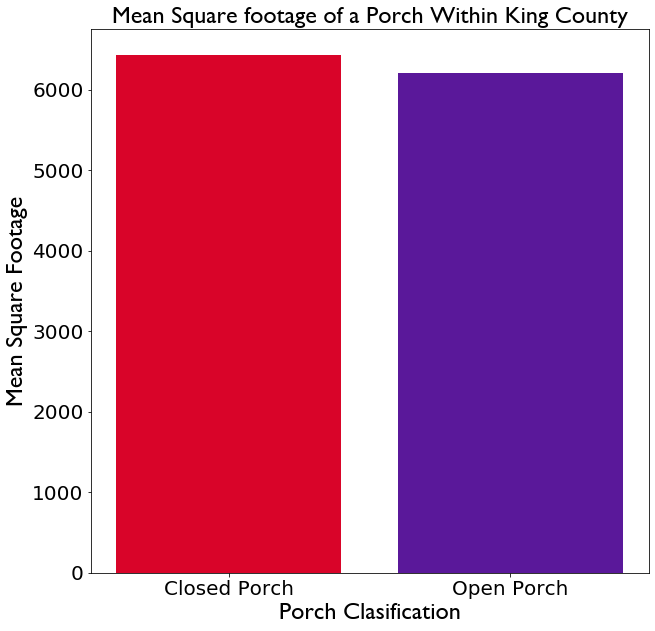

In [132]:
plt.figure(figsize=(10,10))
plt.bar(x=["Closed Porch","Open Porch"],height=[6427.4977597938582,6207.130930695035],color=["#d90429", "#5a189a"],);
plt.ylabel('Mean Dollar Price per Square Footage', fontsize=24,fontname="Gill Sans MT")
plt.title('Mean S Square footage of a Porch Within King County', fontsize=24,fontname="Gill Sans MT")
plt.xlabel('Porch Clasification', fontsize=24,fontname="Gill Sans MT")
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.savefig('NPorch.png', transparent=True,dpi=300, bbox_inches = "tight")
plt.show()

In [117]:
sales_and_nporch["SalePrice"].mean()

740751.5391432792

In [118]:
sales_and_porch["SalePrice"].mean()

875205.4612280923

ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 15862, 'y' with size 15862.

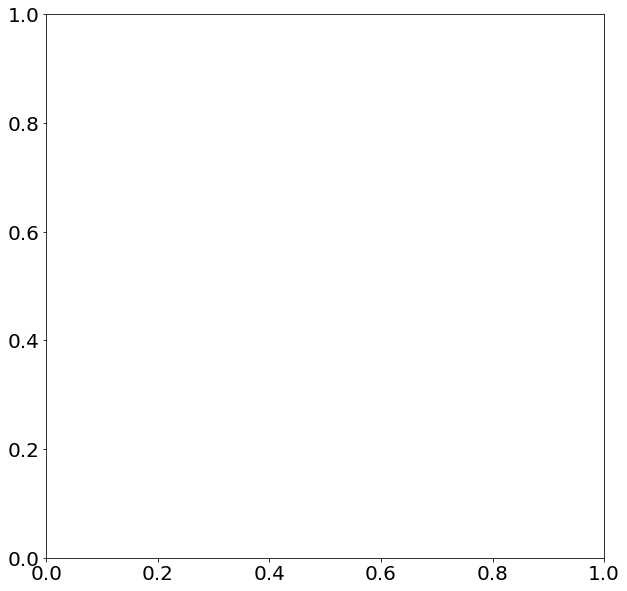

In [115]:
plt.figure(figsize=(10,10))
plt.scatter(x=[sales_and_porch["SqFtOpenPorch"]],y=[sales_and_nporch["SalePrice"], sales_and_porch["SalePrice"]],color=["#0077b6", "#BC6C25"]);
plt.ylabel('Mean Square Footage', fontsize=24,fontname="Gill Sans MT")
plt.title('Mean Sale Price of Houses with a Porch versus Without Within King County', fontsize=24,fontname="Gill Sans MT")
plt.xlabel('Porch Clasification', fontsize=24,fontname="Gill Sans MT")
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.savefig('NYPorch.png', transparent=True,dpi=300, bbox_inches = "tight")
plt.show()